In [2]:
# 모델 분석에 필요한 라이브러리 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
import platform

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# 모듈로 구현한 데이터 분석용 클래스 import 
from DataAnalysis import DataCheck
from DataAnalysis import DataModify
from DataAnalysis import DataPreprocessing
from DataAnalysis import DataVisualize

├── data        
│   └── Tree_Data.csv        # 분석용 원본 데이터       
│   
├── DataAnalysis.py          # 데이터 분석 관련 모듈    
│   │   
│   ├── DataCheck            # 데이터 확인 클래스   
│   │   ├── set_categorical_threshold(boundary)       # (static method) 범주형 기준치 설정    
│   │   ├── return_cols(df, type, boundary)           # (static method) 연속형/범주형 컬럼 반환
│   │   ├── print_info(df)                            # DataFrame 정보 및 기초통계 출력       
│   │   ├── print_value_counts(df)                    # 범주형 데이터에 대해 컬럼별 값의 종류와 수 출력   
│   │   └── save_to_csv(df)                           # DataFrame을 CSV로 저장    
│   │   
│   ├── DataModify           # 데이터 정제 클래스   
│   │   ├── data_anomaly_edit(df, return_anomaly)   # (static method) Alive, Phenolics, NSC, Lignin 이상치 제거     
│   │   ├── split_feature_label(df, test_size)      # (static method) X, y 분리 후 train/test 세트 반환         
│   │   └── scale_data(train_set, test_set)         # (static method) 연속형 feature 스케일링(StandardScaler)           
│   │       
│   ├── DataPreprocessing    # 데이터 전처리 클래스         
│   │   ├── set_drop_cols(cols)                # 드랍할 컬럼 설정               
│   │   ├── call_raw_data()                    # 수정 전의 원본 데이터 반환         
│   │   ├── call_full_data()                   # 수정된 데이터 반환         
│   │   ├── drop_data(columns)                 # 불필요한 컬럼 제거     
│   │   ├── fill_na()                          # Harvest, Alive, EMF 결측치 처리        
│   │   ├── category_encoding(encoding)        # 범주형 데이터 인코딩 (label/onehot)        
│   │   ├── category_decoding(df, categories)  # 인코딩된 데이터 디코딩     
│   │   ├── set_date()                         # 날짜 포맷 통일     
│   │   ├── merge_label(df)                    # Event, Harvest, Alive → 3가지 label 통합       
│   │   └── run(encoding, return_anomaly)      # 전처리 전체 파이프라인 실행 (return_anomaly : 이상치로 측정되어 수정된 컬럼을 따로 확인할 것인지 여부)     
│   │       
│   └── DataVisualize        # 데이터 시각화 클래스     
│       ├── show_boxplot_for_continuous_value(df)                   # 연속형 데이터에 대한 boxplot      
│       ├── show_anomaly_score(column, df, ...)                     # Isolation Forest를 이용하여 이상치 점수를 측정하고 시각화     
│       ├── show_heatmap_for_continuous_value(df)                   # 연속형 데이터 간의 correlation heatmap        
│       ├── show_survival_ratio(df, col)                            # 범주형 데이터의 값 별 생존율 누적 막대그래프      
│       ├── show_survival_ratio_with_threshold(df, col, threshold)  # 연속형 데이터의 값 별 생존율 누적 막대 그래프     
│       ├── show_alive_about_time(df)                               # 시간에 따른 Alive 상태 변화 추이      
│       ├── show_survival_heatmap_by_soil(df)                       # 토양 출처 vs 종별 생존율 heatmap      
│       ├── show_chemical_histogram(df, col)                        # 화합물 분포 히스토그램        
│       ├── show_chemical_relation_scatter(df, versus)              # 화합물 간 산점도      
│       ├── show_chemical_relation_by_survive(df)                   # Alive 상태 vs 화합물 boxplot      
│       └── show_hitmap_by_Myco(df)                                 # Myco vs SoilMyco 교차 heatmap     
│       
└── main.ipynb               # 실행용 Notebook      


In [3]:
### matplotlib 에서 한글 및 음수 표현이 깨지는 현상 수정

system = platform.system()

if system == "Windows":     # Windows
    rcParams['font.family'] = 'Malgun Gothic'
elif system == "Darwin":    # macOS
    rcParams['font.family'] = 'AppleGothic'

rcParams['axes.unicode_minus'] = False

### 1. 데이터 로드

In [4]:
### 데이터 로드

input_file_path = './data/Tree_data.csv'

df = pd.read_csv(input_file_path)

### 객체 인스턴스 생성
dc = DataCheck(df)
dp = DataPreprocessing(df)
dv = DataVisualize(df)

### 2. 데이터 구조 및 기초 통계 확인

In [5]:
### 데이터에 대한 정보 출력

dc.print_info()

------ Data Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-nul

,No,Plot,Light_ISF,Core,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,1283.00000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2782.000000
mean,3914.513834,9.561624,0.085707,2016.648940,20.553069,26.47675,1.933105,15.759792,14.219641,15.282070,53.487244,0.570453
std,2253.515063,5.203659,0.025638,0.477387,12.309587,16.63689,1.969842,6.779607,4.298271,9.166555,32.082942,0.495100
min,3.000000,1.000000,0.032000,2016.000000,0.000000,0.00000,-1.350000,2.230000,4.300000,4.000000,14.000000,0.000000
25%,1971.000000,5.000000,0.066000,2016.000000,13.400000,13.78000,0.170000,10.355000,11.605000,7.000000,24.500000,0.000000
50%,3932.000000,10.000000,0.082000,2017.000000,18.000000,27.72000,0.750000,14.040000,12.660000,13.000000,45.500000,1.000000
75%,5879.000000,14.000000,0.100000,2017.000000,24.445000,35.71000,3.780000,21.115000,17.275000,18.000000,63.000000,1.000000
max,7772.000000,18.000000,0.161000,2017.000000,100.000000,87.50000,6.100000,32.770000,29.450000,33.000000,115.500000,1.000000


##### 데이터 기초 통계 확인 결과
1. 최소값이 0 또는 음수인 컬럼이 존재한다. (AMF, EMF, Phenolics)
2. 결측치가 있는 컬럼이 존재한다. (EMF, Alive, Event, Harvest, Alive)

### 3. 결측치 및 이상치 탐색

In [6]:
### 범주형 데이터에 대한 컬럼값을 출력하여 문제가 있는지 확인

dc.print_value_counts()

No
continuous
--------------------
Plot
continuous
--------------------
Subplot
A    701
D    666
B    663
C    646
E    107
Name: count, dtype: int64
--------------------
Species
Acer saccharum     751
Prunus serotina    749
Quercus alba       673
Quercus rubra      610
Name: count, dtype: int64
--------------------
Light_ISF
continuous
--------------------
Light_Cat
Med     1474
Low     1005
High     304
Name: count, dtype: int64
--------------------
Core
2017    1806
2016     977
Name: count, dtype: int64
--------------------
Soil
Sterile                  423
Prunus serotina          413
Quercus rubra            402
Acer saccharum           397
Populus grandidentata    391
Quercus alba             381
Acer rubrum              376
Name: count, dtype: int64
--------------------
Adult
continuous
--------------------
Sterile
Non-Sterile    2360
Sterile         423
Name: count, dtype: int64
--------------------
Conspecific
Heterospecific    1974
Sterilized         423
Conspecific        

* Event 컬럼이 결측치인 값이 1개 존재한다.

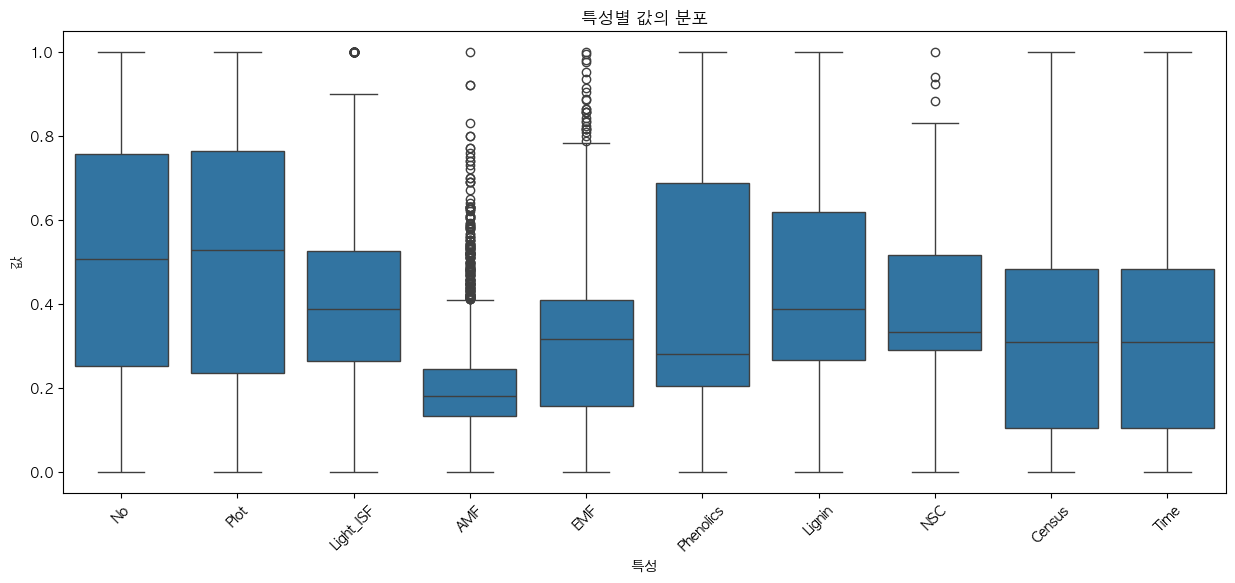

In [7]:
### 연속형 데이터에 대한 컬럼값을 boxplot으로 출력하여 이상치가 있는지 확인

dv.show_boxplot_for_continuous_value()

* Light_ISF, AMF, EMF, NSC 에 이상치일 수 있는 값들이 발견

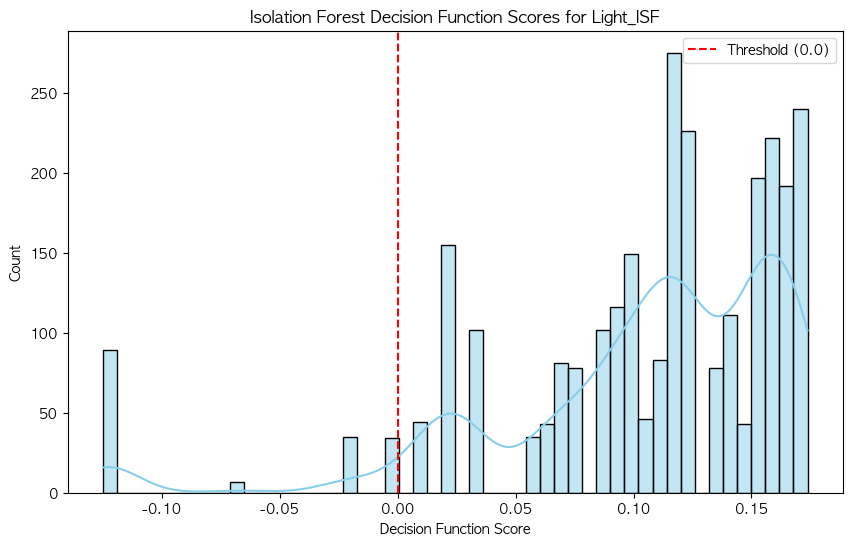

,Light_ISF,IF_score
889,0.047,-0.020923
892,0.047,-0.020923
899,0.047,-0.020923
905,0.047,-0.020923
908,0.047,-0.020923
...,...,...
2769,0.138,0.000000
2771,0.161,-0.120883
2773,0.161,-0.120883
2776,0.138,0.000000


In [8]:
### boxplot에서 이상치가 확인된 특정 행들에 대해 분포를 확인하고, 이상치가 있는지 확인

anomalies = dv.show_anomaly_score(column='Light_ISF', return_anomalies=True, threshold=0.0)
display(anomalies)

* 이상치일 수 있는 값들이 존재하는 컬럼에 대해 컬럼명을 대입하여 확인
* 각 컬럼별로 이상치로 예상되는 값들을 확인한 결과, Phenolics 에 음수값이 들어있는 것을 제외하면 큰 이상치는 없음

In [9]:
### 이상치를 확인한 후, 이상치를 제거

df_cleaned, anomalies = DataModify.data_anomaly_edit(df, return_anomaly=True)
display(anomalies)
#

,Index,Column,Value
0,2781,Alive,NA
1,0,Phenolics,-0.56
2,3,Phenolics,-0.71
3,4,Phenolics,-0.58
4,9,Phenolics,-0.05
...,...,...,...
502,2624,Phenolics,-0.03
503,2663,Phenolics,-0.02
504,2733,Phenolics,-0.63
505,2746,Phenolics,-0.21


##### 확인된 이상치 및 제거 방법
- 관련 논문을 확인해본 결과, 음수 Phenolics는 해당 물질의 비율이 극히 낮을때 발생 가능 -> 최솟값을 0으로 설정하고 해당 값 만큼 보정
- EMF 의 결측치 : EMF가 존재하지 않음을 의미 (0은 극히 일부만 존재) -> 결측치를 0으로 처리

### 4. 데이터 시각화를 통한 탐색

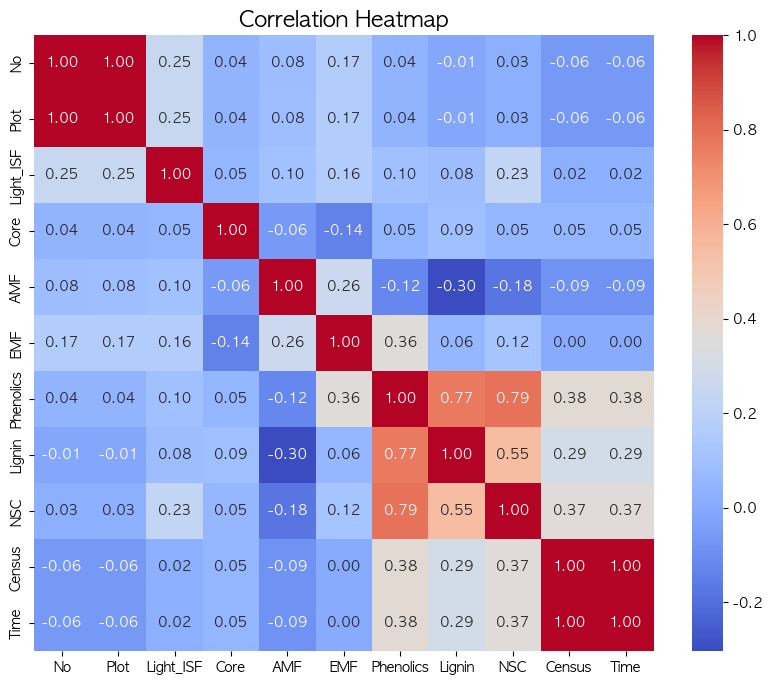

In [10]:
### 특성 데이터를 분석하기 위해, 라벨 데이터를 병합하고 정제
df_cleaned = dp.merge_label(df_cleaned)

### 숫자값들을 기반으로 correlation 히트맵 출력

dv.show_heatmap_for_continuous_value(df_cleaned)

* 단순 인덱스 혹은 범위를 나타내는 데이터들을 제외하면,
    - 내재 화합물(Phenolics, NSC, Lignin) 은 상호간에 높은 상관관계를 보임
    - 측정 기간(Time)과 내재 화합물 역시 유의미한 상관관계를 가짐

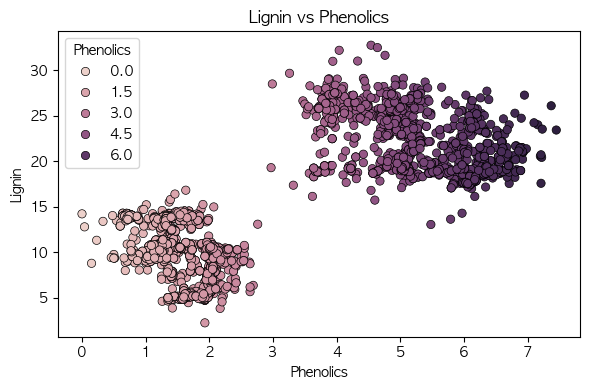

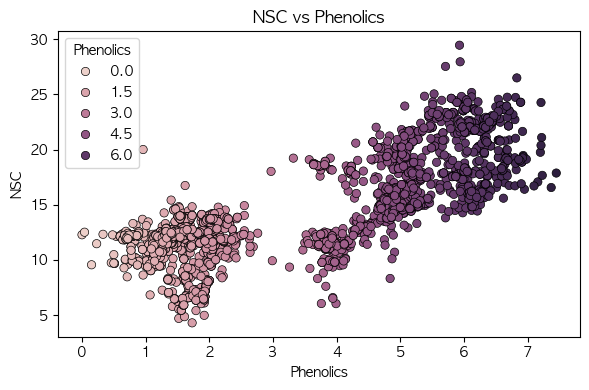

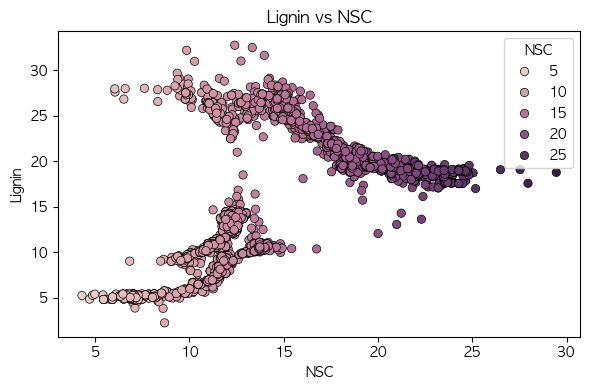

In [11]:
### 내재 화합물 관계성 파악을 위한 산점도 확인

dv.show_chemical_relation_scatter(df_cleaned, versus=[('Phenolics', 'Lignin')])
dv.show_chemical_relation_scatter(df_cleaned, versus=[('Phenolics', 'NSC')])
dv.show_chemical_relation_scatter(df_cleaned, versus=[('NSC', 'Lignin')])

* 높은 상관관계를 보이는 내재 화합물 간의 관계성 파악
    - Phenolics vs Lignin : 둘 다 식물의 방어와 세포벽 강화에 관여 (비례 관계)
    - Phenolics vs NSC : NSC는 저장물질로 페놀산 생산에 필요한 에너지원 (NCS이 많으면 페놀산도 많음, 비례 관계)
    - NSC vs Lignin : NSC는 단기 저장, 리그닌은 장기 구조 강화 목적 (어릴수록 NSC가 성숙할수록 리그닌이 많음)

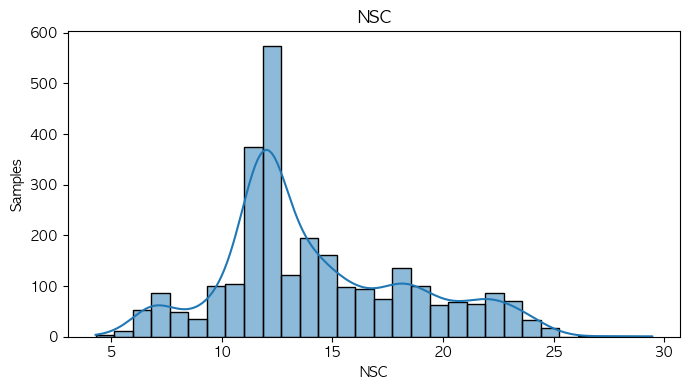

In [12]:
### 내재 화합물에 따른 값의 분포 출력

dv.show_chemical_histogram(df_cleaned, 'NSC')

<Figure size 1000x600 with 0 Axes>

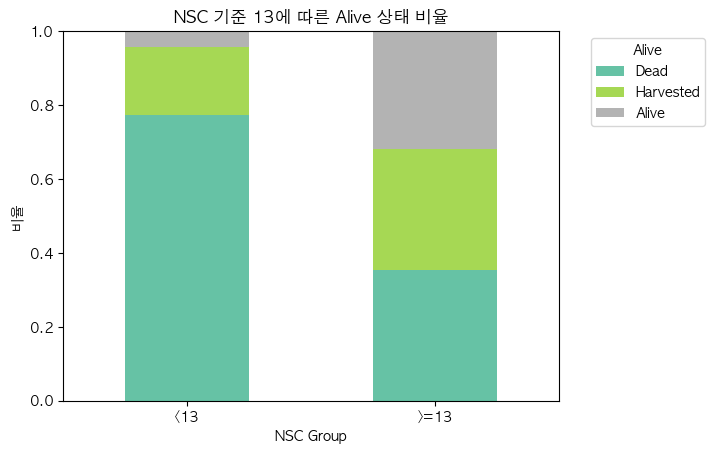

In [13]:
### 연속형 데이터의 값의 범위에 따른 생존율 출력

dv.show_survival_ratio_with_threshold(df_cleaned, 'NSC', 13)

* 값의 분포를 출력하여, 크게 보이는 값을 통해 나눠 분석
    - Phenolics 값은 값이 큰 그룹이 생존율이 유의미하게 높음을 발견

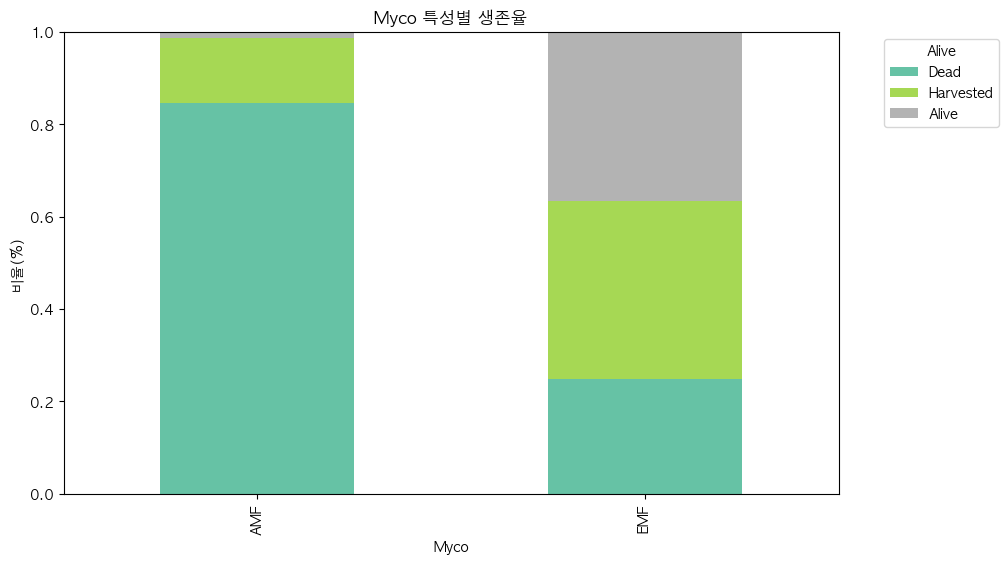

In [14]:
### 범주형 데이터의 특성값에 따른 생존율 출력

dv.show_survival_ratio(df_cleaned, 'Myco')

* 종에 따라 생존율이 많은 차이를 보임
* 동종 (Concpecific)에서 채취한 토양을 사용한 개체가 더 높은 사망률을 보이고, 살균(Sterilized) 된 토양을 사용한 개체가 더 높은 생존율을 보임
* AMF보다 EMF가 유의미하게 높은 생존율을 보임

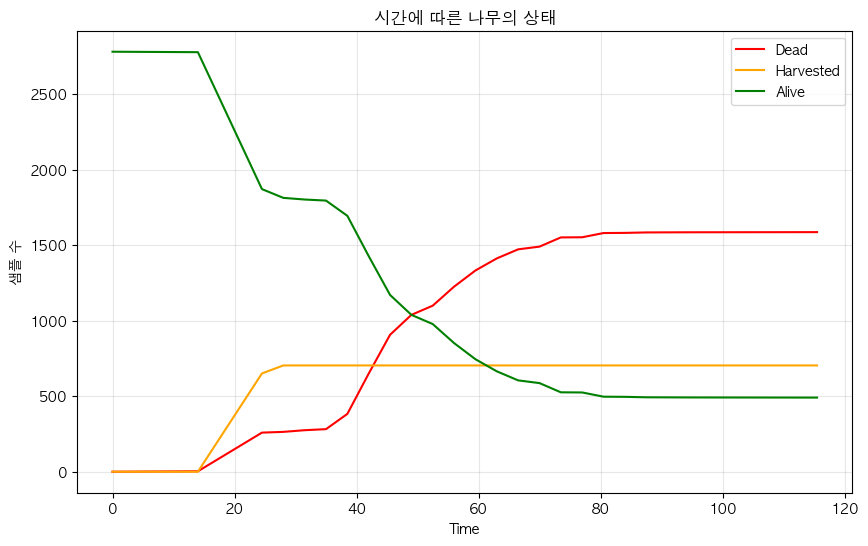

In [15]:
### 시간 경과에 따른 생존율 출력

dv.show_alive_about_time(df_cleaned)

### 5. 데이터 정제 및 전처리

In [16]:
### 분석 결과를 바탕으로 드랍할 컬럼 설정
drop_cols = ['No', 'Plot', 'Adult', 'Subplot', 'Core', 'Census']
dp.set_drop_cols(drop_cols)

### 전처리 과정 실행 
# (데이터 드랍 -> 이상치 처리 -> 결측치 처리 -> 날짜값 통일 -> 라벨 데이터 통합 -> 인코딩)

encode = dp.run(encoding='label', return_anomaly=False) # return anomaly : 이상치로 판단된 특성들을 확인할 것인지
display(encode)
dc.print_info(encode)

,Species,Light_ISF,Light_Cat,Soil,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Time,Alive
0,0,0.106,0,0,0,0,0,0,0,22.00,0.00,0.79,13.86,12.15,14.0,0
1,1,0.106,0,1,0,0,1,1,1,15.82,31.07,6.54,20.52,19.29,115.5,1
2,2,0.106,0,0,0,0,1,0,1,24.45,28.19,4.71,24.74,15.01,63.0,0
3,0,0.080,0,0,0,0,0,0,0,22.23,0.00,0.64,14.29,12.36,14.0,0
4,0,0.060,1,0,0,0,0,0,0,21.15,0.00,0.77,10.85,11.20,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,1,0.122,2,1,0,0,1,1,1,10.89,39.00,6.88,21.44,18.99,56.0,0
2778,3,0.111,0,3,0,0,0,1,0,40.89,0.00,2.18,9.15,11.88,56.0,0
2779,1,0.118,0,2,0,0,1,0,1,15.47,32.82,6.23,19.01,23.50,56.0,0
2780,1,0.118,0,1,0,0,1,1,1,11.96,37.67,6.86,21.13,19.10,56.0,0


------ Data Info -----
<class 'pandas.core.frame.DataFrame'>
Index: 2782 entries, 0 to 2782
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      2782 non-null   int64  
 1   Light_ISF    2782 non-null   float64
 2   Light_Cat    2782 non-null   int64  
 3   Soil         2782 non-null   int64  
 4   Sterile      2782 non-null   int64  
 5   Conspecific  2782 non-null   int64  
 6   Myco         2782 non-null   int64  
 7   SoilMyco     2782 non-null   int64  
 8   PlantDate    2782 non-null   int64  
 9   AMF          2782 non-null   float64
 10  EMF          2782 non-null   float64
 11  Phenolics    2782 non-null   float64
 12  Lignin       2782 non-null   float64
 13  NSC          2782 non-null   float64
 14  Time         2782 non-null   float64
 15  Alive        2782 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 434.0 KB

----- Data Describe -----


,Species,Light_ISF,Light_Cat,Soil,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Time,Alive
count,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000
mean,1.487779,0.085680,0.579080,2.978433,0.151689,0.429188,0.460820,0.725377,0.470884,20.554349,12.202430,3.282261,15.758490,14.217074,53.464953,0.682602
std,1.152688,0.025603,0.679515,2.001322,0.358784,0.722960,0.498552,0.709059,0.499241,12.311615,17.374419,1.969693,6.780478,4.296910,32.067148,0.850310
min,0.000000,0.032000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.230000,4.300000,14.000000,0.000000
25%,0.000000,0.066000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.400000,0.000000,1.520000,10.352500,11.602500,24.500000,0.000000
50%,1.000000,0.082000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.000000,2.100000,14.040000,12.655000,45.500000,0.000000
75%,3.000000,0.100000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,24.447500,25.922500,5.130000,21.117500,17.270000,63.000000,2.000000
max,3.000000,0.161000,2.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,100.000000,87.500000,7.450000,32.770000,29.450000,115.500000,2.000000
